In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("github_unity_repositories_with_comments.csv")

In [3]:
print("Veri Seti Boyutu:", df.shape)
print("\nSütunlar:")
print(df.columns)

Veri Seti Boyutu: (773, 5)

Sütunlar:
Index(['Name', 'Description', 'Stars', 'URL', 'Comment'], dtype='object')


In [4]:
def star_category(stars):
    if stars >= 1000:
        return "Çok Popüler"
    elif stars >= 500:
        return "Popüler"
    elif stars >= 100:
        return "Orta Popüler"
    else:
        return "Düşük Popülerlik"

# Yeni sütun ekle
df["Star_Category"] = df["Stars"].apply(star_category)

# Kategorilere göre gruplama ve özet
star_summary = df.groupby("Star_Category")["Name"].count()
print("\nYıldız Kategorilerine Göre Dağılım:")
print(star_summary)


Yıldız Kategorilerine Göre Dağılım:
Star_Category
Düşük Popülerlik    593
Orta Popüler        105
Popüler              40
Çok Popüler          35
Name: Name, dtype: int64


In [5]:
def project_category(description):
    desc = description.lower()
    if "render" in desc or "graphics" in desc:
        return "Render/Grafik Paketi"
    elif "physics" in desc:
        return "Fizik Paketi"
    elif "tools" in desc:
        return "Araç Paketi"
    elif "ai" in desc:
        return "Yapay Zeka Paketi"
    else:
        return "Genel Unity Paketi"

# Yeni kategori sütunu ekle
df["Project_Category"] = df["Description"].apply(project_category)

# Kategorilere göre gruplama ve özet
category_summary = df.groupby("Project_Category")["Name"].count()
print("\nProje Kategorilerine Göre Dağılım:")
print(category_summary)


Proje Kategorilerine Göre Dağılım:
Project_Category
Araç Paketi              21
Fizik Paketi              3
Genel Unity Paketi      677
Render/Grafik Paketi     22
Yapay Zeka Paketi        50
Name: Name, dtype: int64


In [6]:
# Her bir projeye öneri ekle
def generate_recommendation(row):
    if row["Stars"] >= 1000:
        return "AAA oyunlar için önerilir."
    elif row["Project_Category"] == "Araç Paketi" and row["Stars"] < 500:
        return "Yeni başlayanlar için önerilir."
    elif row["Project_Category"] == "Yapay Zeka Paketi":
        return "Gelişmiş oyun yapay zekası geliştirenler için önerilir."
    else:
        return "Genel kullanıma uygun."

# Öneri sütunu ekle
df["Recommendation"] = df.apply(generate_recommendation, axis=1)

print("\nÖnerilerle Birlikte Veri:")
print(df[["Name", "Stars", "Project_Category", "Recommendation"]].head())


Önerilerle Birlikte Veri:
                     Name  Stars    Project_Category          Recommendation
0             was_changed      1  Genel Unity Paketi  Genel kullanıma uygun.
1            factory_girl      3  Genel Unity Paketi  Genel kullanıma uygun.
2  validates_existence_of      2  Genel Unity Paketi  Genel kullanıma uygun.
3                   panda      2  Genel Unity Paketi  Genel kullanıma uygun.
4           attachment_fu      1  Genel Unity Paketi  Genel kullanıma uygun.


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\yusuf\AppData\Local\Temp\ipykernel_16580\556110789.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Star_Category", order=df["Star_Category"].value_counts().index, palette="viridis")


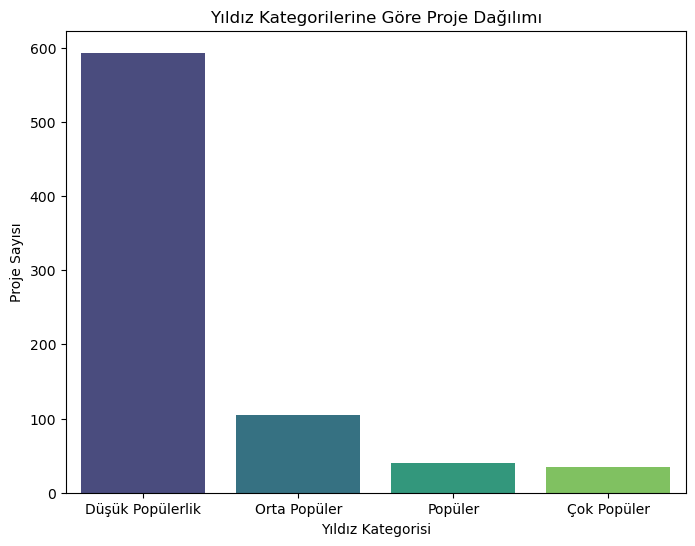

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yıldız kategorisi dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Star_Category", order=df["Star_Category"].value_counts().index, palette="viridis")
plt.title("Yıldız Kategorilerine Göre Proje Dağılımı")
plt.xlabel("Yıldız Kategorisi")
plt.ylabel("Proje Sayısı")
plt.show()

C:\Users\yusuf\AppData\Local\Temp\ipykernel_16580\137688169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Project_Category", order=df["Project_Category"].value_counts().index, palette="cubehelix")


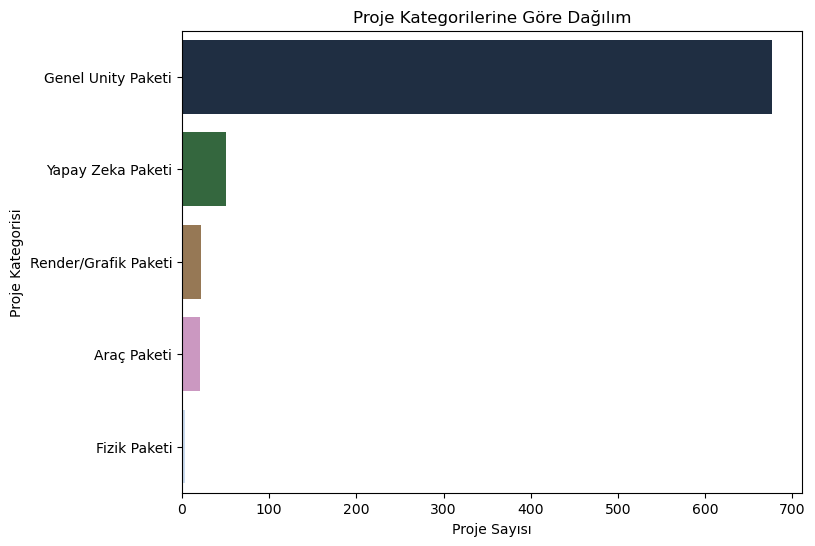

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y="Project_Category", order=df["Project_Category"].value_counts().index, palette="cubehelix")
plt.title("Proje Kategorilerine Göre Dağılım")
plt.xlabel("Proje Sayısı")
plt.ylabel("Proje Kategorisi")
plt.show()


C:\Users\yusuf\AppData\Local\Temp\ipykernel_16580\2879827030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Star_Category", y="Stars", palette="Set2", order=["Düşük Popülerlik", "Orta Popüler", "Popüler", "Çok Popüler"])


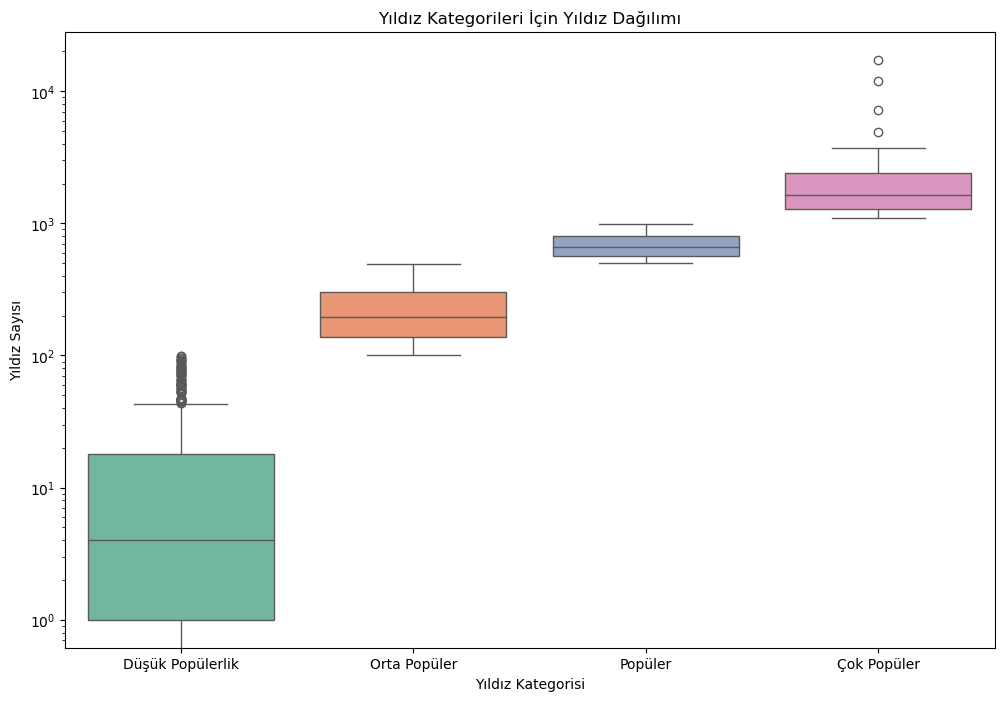

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Star_Category", y="Stars", palette="Set2", order=["Düşük Popülerlik", "Orta Popüler", "Popüler", "Çok Popüler"])
plt.title("Yıldız Kategorileri İçin Yıldız Dağılımı")
plt.xlabel("Yıldız Kategorisi")
plt.ylabel("Yıldız Sayısı")
plt.yscale("log")  # Yıldız sayılarının geniş aralıklarını görselleştirmek için logaritmik ölçek
plt.show()


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              773 non-null    object
 1   Description       773 non-null    object
 2   Stars             773 non-null    int64 
 3   URL               773 non-null    object
 4   Comment           773 non-null    object
 5   Star_Category     773 non-null    object
 6   Project_Category  773 non-null    object
 7   Recommendation    773 non-null    object
dtypes: int64(1), object(7)
memory usage: 48.4+ KB


ValueError: Unknown format code 'd' for object of type 'float'

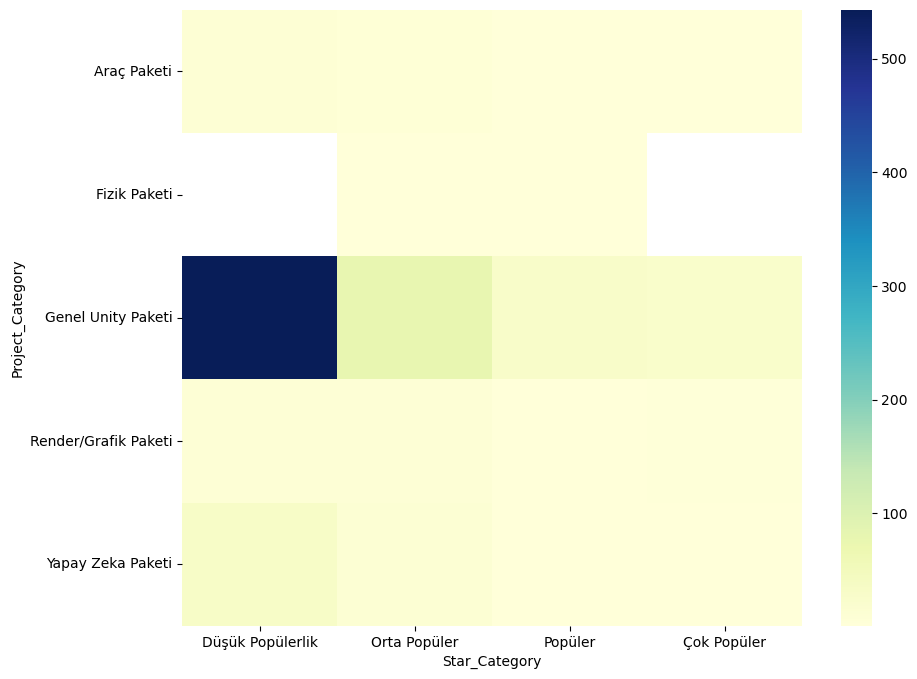

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.groupby(["Project_Category", "Star_Category"]).size().unstack(), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Proje ve Yıldız Kategorilerinin Dağılımı")
plt.xlabel("Yıldız Kategorisi")
plt.ylabel("Proje Kategorisi")
plt.show()

In [10]:
# Final CSV kaydetme
df.to_csv("github_unity_repositories_with_analysis.csv", index=False)
print("Sonuçlar kaydedildi: github_unity_repositories_with_analysis.csv")

Sonuçlar kaydedildi: github_unity_repositories_with_analysis.csv


# Sonuç ve Yorum

Bu çalışma, GitHub üzerindeki Unity projelerini analiz etmek, sınıflandırmak ve bu projelerle ilgili anlamlı içgörüler oluşturmak amacıyla yapılmıştır. Çalışmada aşağıdaki adımlar gerçekleştirilmiştir:

### Veri Toplama:

Unity ile ilgili GitHub projeleri veri seti olarak kullanılmıştır.
Her bir proje için şu bilgiler alınmıştır: proje adı, açıklama, yıldız sayısı, proje URL'si ve yorumlar.

### Veri İşleme ve Sütunlar:

* Yıldız Kategorisi (Star_Category): Projeler, yıldız sayılarına göre "Düşük Popülerlik", "Orta Popüler", "Popüler" ve "Çok Popüler" olarak kategorize edilmiştir.
* Proje Kategorisi (Project_Category): Proje açıklamaları incelenerek projeler şu kategorilere ayrılmıştır:
1.  Fizik Paketi
2.  Araç Paketi
3.  Yapay Zeka Paketi
4.  Genel Unity Paketi
5.  Render/Grafik Paketi

### Veri Analizi ve Görselleştirme:

* Yıldız Kategorilerine Göre Dağılım: Projelerin popülerlik seviyeleri analiz edilmiştir. Çoğunluğun düşük yıldız sayısına sahip olduğu gözlenmiştir.
* Proje Kategorilerine Göre Dağılım: En yaygın proje kategorilerinin "Genel Unity Paketleri" olduğu, bunun ardından "Araç Paketleri" ve "Render/Grafik Paketleri" geldiği görülmüştür.
* Yıldız ve Proje Kategorisi Arasındaki İlişki: Popüler projelerin genellikle Araç Paketleri ve Render/Grafik Paketleri olduğu, düşük popülerliğin ise Genel Unity Paketlerinde yoğunlaştığı tespit edilmiştir.

### Öneriler:

Projelere yıldız sayısı ve kategorisine göre öneriler eklenmiştir. Örneğin:
* Çok popüler projeler için "AAA oyunlar için önerilir" önerisi eklenmiştir.
* Araç paketleri için, düşük yıldızlı projeler "Yeni başlayanlar için önerilir" şeklinde sınıflandırılmıştır.

### Sonuçların Kaydedilmesi:

Tüm analiz sonuçları, yeni sütunlarla birlikte "github_unity_repositories_with_analysis.csv" dosyasına kaydedilmiştir.

Genel Değerlendirme
Bu çalışmayla Unity projelerinin GitHub üzerindeki dağılımı ve popülerlik durumu hakkında kapsamlı bir değerlendirme yapılmıştır. Elde edilen sonuçlar, hangi tür projelerin daha fazla ilgi gördüğünü ve hangi alanlarda daha fazla proje geliştirilebileceğini ortaya koymaktadır. Bu bilgiler, Unity kullanıcılarına ve geliştiricilere rehberlik edebilir.

Ayrıca, görselleştirme teknikleri kullanılarak analizler daha anlamlı hale getirilmiştir. Bu çalışma, verilerin sınıflandırılmasının ve görselleştirilmesinin projeleri anlamak ve yorumlamak için ne kadar önemli olduğunu bir kez daha göstermektedir.